# Graphing foriegn and domestic data

---

In [27]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from bs4 import BeautifulSoup
import re
import urllib
import os
from functions import * #will take a while to load
import seaborn as sns

In [51]:
#get the csv into right directory
df = pd.read_csv('boxmojo_db.csv')
worldwide_domestic_df = df

In [5]:
# Clean up columns
worldwide_domestic_df['Worldwide'] = worldwide_domestic_df['Worldwide'].str.replace(',', '').str.replace('$', '').astype(int)
worldwide_domestic_df['Domestic'] = worldwide_domestic_df['Domestic'].str.replace('-', '')
worldwide_domestic_df['Foreign'] = worldwide_domestic_df['Foreign'].str.replace('-', '')
worldwide_domestic_df = worldwide_domestic_df.replace(r'^\s*$', np.NaN, regex=True)
worldwide_domestic_df['Domestic'] = worldwide_domestic_df['Domestic'].str.replace(',', '').str.replace('$', '')
worldwide_domestic_df['Foreign'] = worldwide_domestic_df['Foreign'].str.replace(',', '').str.replace('$', '')
worldwide_domestic_df.fillna('Domestic')
worldwide_domestic_df[["Domestic", "Foreign"]] = worldwide_domestic_df[["Domestic", "Foreign"]].apply(pd.to_numeric)

In [6]:
# Create sum variables
domestic_sum = worldwide_domestic_df.Domestic.sum()
foreign_sum = worldwide_domestic_df.Foreign.sum()

In [7]:
# Create mean variables
domestic_mean = worldwide_domestic_df.Domestic.mean()
foreign_mean = worldwide_domestic_df.Foreign.mean()

**Measures of central tendency by decade**

In [8]:
foreign_sum_decades = [int(worldwide_domestic_df.iloc[a:b].Foreign.sum()) for a,b in zip(range(0,2100,100),range(100,2200,100))]
domestic_sum_decades = [int(worldwide_domestic_df.iloc[a:b].Domestic.sum()) for a,b in zip(range(0,2100,100),range(100,2200,100))]
foreign_mean_decades = [int(worldwide_domestic_df.iloc[a:b].Foreign.mean()) for a,b in zip(range(0,2100,100),range(100,2200,100))]
domestic_mean_decades = [int(worldwide_domestic_df.iloc[a:b].Domestic.mean()) for a,b in zip(range(0,2100,100),range(100,2200,100))]

In [9]:
# Range of decades to plot
decades = [int(x) for x in range(1999,2020)]

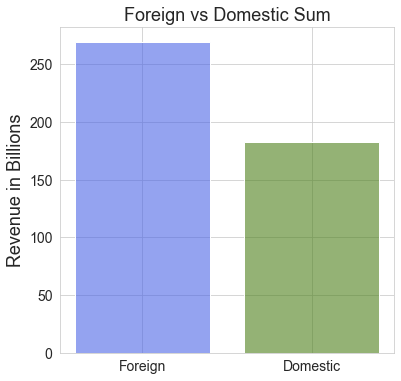

In [33]:
plt.figure(figsize=(6,6))
plt.bar(['Foreign', 'Domestic'], [foreign_sum/1000000000,domestic_sum/1000000000],
        color=([0.3, 0.4, 0.9, 0.6], [0.3, 0.5, 0.1, 0.6]))
plt.ylabel('Revenue in Billions')
plt.title('Foreign vs Domestic Sum')
plt.show()

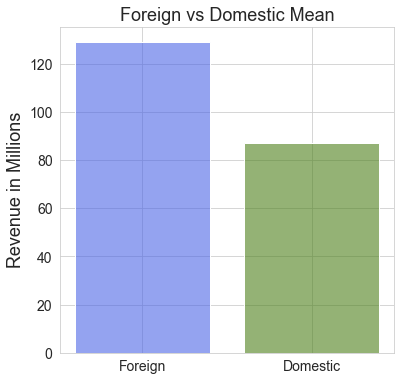

In [19]:
plt.figure(figsize=(6,6))
plt.bar(['Foreign', 'Domestic'], [foreign_mean/1000000,domestic_mean/1000000],
        color=([0.3, 0.4, 0.9, 0.6], [0.3, 0.5, 0.1, 0.6]))
plt.ylabel('Revenue in Millions')
plt.title('Foreign vs Domestic Mean')

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)
plt.show()

**While the domestic sum and mean had dips, the foreign movie market has had a high and steady positive linear correlation over time**

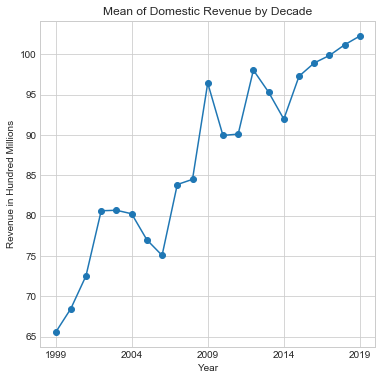

In [53]:
#single plot of domestic revenue by decade
plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.plot(decades, a, marker = 'o')
plt.xlabel('Year')
plt.xticks(quarterly)
plt.title('Mean of Domestic Revenue by Decade')
plt.ylabel('Revenue in Hundred Millions')

plt.show()

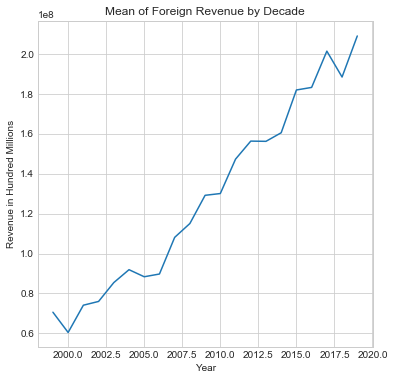

In [54]:
#single plot of foreign revenue by decade
plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')
plt.plot(decades,foreign_mean_decades[:])
plt.ylabel('Revenue in Hundred Millions')
plt.title('Mean of Foreign Revenue by Decade')
plt.xlabel('Year')
plt.show()

# ---Combining Two Graphs ---

In [17]:
#create quartley year x labels
quarterly = [int(x) for x in range(1999,2020,5)]

In [16]:
#dividing by millions for y labels of graphs
a = [i/1000000 for i in domestic_mean_decades[:]]
b = [i/1000000 for i in foreign_mean_decades[:]]


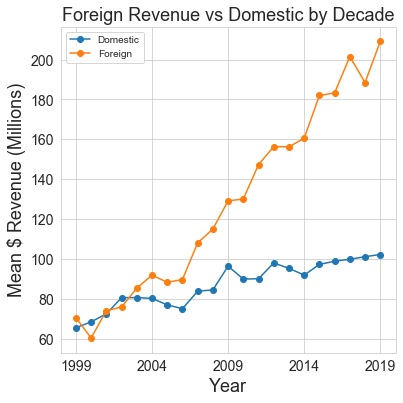

In [18]:
#combined plots
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (6,6),sharex = True,sharey = True)
ax1 = ax
ax1.plot(decades, a, marker = 'o')
ax1.set_xlabel('Year')
ax1.set_xticks(quarterly)
# ax1.set_title('Mean of Domestic Revenue by Decade')
# ax1.set_ylabel('Revenue in Hundred Millions')

ax2 = ax
ax2.plot(decades, b, marker = 'o')
ax2.set_xlabel('Year')
ax2.set_xticks(quarterly)
# ax2.set_title('Mean of Foreign Revenue by Decade')
# ax2.set_ylabel('Revenue in Hundred Millions')

#formating
plt.title('Foreign Revenue vs Domestic by Decade')
plt.ylabel('Mean $ Revenue (Millions)')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

plt.legend(['Domestic','Foreign',])

# ----  Sum of domestic vs foreign ----

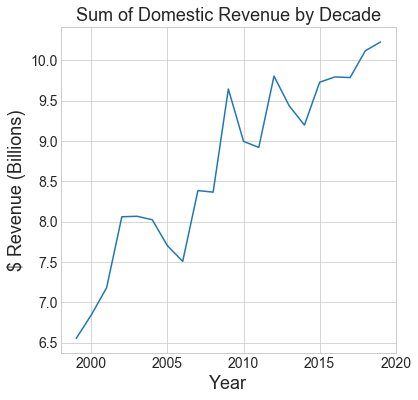

In [49]:
#plot sum domestic revenue
plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')

#configure y labels
y = [domestic/1000000000 for domestic in domestic_sum_decades[:]]
plt.plot(decades,y)
plt.ylabel('Revenue in Billions')
plt.title('Sum of Domestic Revenue by Decade')

ax2 = ax
ax2.plot(decades, b, marker = 'o')
plt.xlabel('Year')
ax2.set_xticks(quarterly)

#formating
plt.ylabel('$ Revenue (Billions)')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

plt.show()

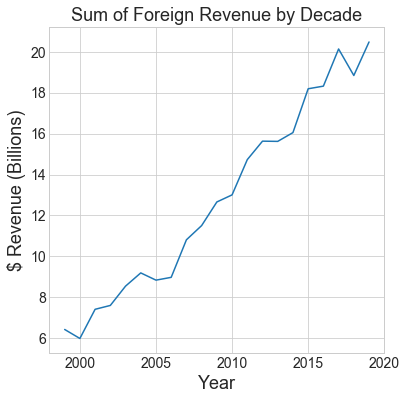

In [48]:
#plot sum of foreign revenue 
plt.figure(figsize=(6,6))
plt.style.use('seaborn-whitegrid')

#configure y axis
y2 = [foreign/1000000000 for foreign in foreign_sum_decades[:]]

plt.plot(decades,y2)
plt.ylabel('Revenue in Billions')
plt.title('Sum of Foreign Revenue by Decade')

#formating
plt.xlabel('Year')
plt.ylabel('$ Revenue (Billions)')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize= 18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)

plt.show()